# **ANÁLISE DE DADOS DE INADIMPLÊNCIA**

Projeto de Finalização Curso Python EBAC

Busca-se analisar e explicar as razões de inadimplência numa base de dados de crédito, onde a o atributo de interesse é a variável resposta, que indica inadiplência ou não é a "default". E iremos utilizar outros atributos da mesma base de dados pra entendermos o porque um cliente se tornou inadimplente.

## 1\. Bibliotecas

Bibliotecas utilizadas durante todo o processo de análise e visualização de dados

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2\. Download de dados

Os dados utilizados estão disponíveis em um arquivo csv, no qual faremos download
Utilizamos a biblioteca `pandas` para essa leitura

In [49]:
df = pd.read_csv('Python_M10_support material.csv', na_values='na')

## 3\. Exploração de dados



### 3.1 Estrutura do banco de dados

> Aqui veremos o tamanho do nosso banco de dados, e a proporção entre clientes adimplentes e inadimplentes



In [50]:
df.shape

(10127, 16)

In [51]:
df[df['default'] == 0].shape

(8500, 16)

In [52]:
df[df['default'] == 1].shape

(1627, 16)

In [53]:
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

print(f"A proporcão clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


### 3.2 Schema

> Correlacionar a informação com a coluna em que a informação se encontra, e que em tipo ela está armazenada



In [54]:
df.head(5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


Analisando os dados através do `df.head`, o "limite_credito" e "valor_transacoes_12m" estão com valores escritos no formato brasileiro, e precisamos atualizar para o formato ingles, que é a língua nativa do python para poder analisar com mais eficiência

In [55]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

Ao executar essa linha de código `df.dtypes`, percebemos que "limite_credito" e "valor_transacoes_12m" estão como strings, e precisamos corrigir esses dados para que se tornem "floats".

### 3.3 Dados Faltantes

Apesar de precisar ainda corrigir o schema citado a cima, vamos utilizar desse código apena para ver se existe dados faltantes na contagem

 - Atributos **categóricos**.

In [56]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


 - Atributos **numéricos**.

In [57]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


Ao executar, percebemos nos atributos categóricos que "escolaridade", "estado_civil" e "salario_anual" não estão com a contagem igual a 10127, e é o total de linhas que temos no dataframe. E para garantir essa informação, vamos utilizar do cógido a baixo, e se o resultado for "true", quer dizer que existem dados faltantes

In [58]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

Ao executar, vemos que os mesmos atributos tiveram resultado "True", confirmando nossa análise. Vamos agora executar uma função para ver algumas estatísticas dos dados faltantes. Essa função vai criar um dicionário, no qual vai pegar a quantidade de dados faltantes de cada um dos atributos que possuem dados faltantes, e depois calcula a porcetagem dessa quantidade que falta da quantidade total de dados (10127)

In [59]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)


E agora vamos usar da função para observar a quantidade de dados fatantes, a porcetagem em relação ao total de dados, e ver separadamente entre adimplentes e inadimplentes

In [60]:
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [61]:
stats_dados_faltantes(df=df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [62]:
stats_dados_faltantes(df=df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


Podemos analisar rapidamente pelos resultados que não difere de forma relevante a proporção de dados faltantes entre adimplentes e inadimplentes, e isso nos permite eliminar esses dados porque não terá alteração relevante na análise final

## 4\. Limpeza e Transformação de dados

> Agora vamos limpar os dados para que possamos trabalhar e analisar melhor, e para isso vamos corrigir o schema das colunas e remover os dados que estão faltando





### 4.1 Correção do Schema

Na etapa de exploração, notamos que as colunas **limite_credito** e **valor_transacoes_12m** estavam sendo interpretadas como colunas categóricas (`dtype = object`).

In [63]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [64]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


Os códigos acima estão para observar como os dados estão sendo interpretados e escritos, e poderemos comparar com a mudança que iremos fazer agora

Vamos criar uma função `lambda` para limpar os dados. Mas antes, vamos testar sua aplicação através do método funcional `map`:


In [65]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
valores_limpos = list(map(fn, valores_originais))

print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


Ao executar o código, podemos pelos `print` os valores como eram antes e como ficaram ('valore_originais' e 'valores_limpos'), e confirmamos que a função vai agir de forma correta. Então, vamos executá-la nas nossas colunas de interesse. Nossa função está definida como "fn"

In [66]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

Executada, vamos conferir como ficaram nossos dados através desse código abaixo

In [67]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

Ao executar o código acima, vemos que as colunas agora estão definidas como "float64", e podemos concluir que agora nosso dados estão com schema correto. Vamos observar agora nossos atributos categóricos e numéricos.

In [68]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


In [69]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


Agora nossos atributos estão definidos corretamente. Vamos para a próxima etapa.

### 4.2 Remoção de dados faltantes

> Ao fazermos o download de dados, definimos que os dados faltantes seriam reconhecidos como "na" (`na_values='na'`). Com o pandas ciente do que é um dado faltante, vamos remover as linhas problemáticas



In [70]:
df.dropna(inplace=True)

Removidas, vamos analisar nossa estrutura de dados novamente, vendo a quantidade total de linhas, quantidade de linhas dos adimplentes e dos inadimplentes através do `shape`.

In [71]:
df.shape

(7081, 16)

In [72]:
df[df['default'] == 0].shape

(5968, 16)

In [73]:
df[df['default'] == 1].shape

(1113, 16)

In [74]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

print(f"A proporcão adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


Através dos códigos acima, captamos a quantidade anterior de adimplentes e inadimplentes e a quantidade nova de ambos. E comparando os resultados, percebemos que não houve mudança significativa na porcentagem, assim não teremos alterações que poderiam danificar nossa conclusão final após análise.

## 5\. Análise e visualização de dados

Com os dados prontos, vamos criar diversas visualizações para correlacionar variáveis explicativas com a variável resposta para buscar entender qual fator leva um cliente a inadimplencia. E para isso, vamos sempre comparar a base com todos os clientes com a base de adimplentes e inadimplentes.

Começamos definindo o estilo do gráfico e separando os clientes adimplentes e inadimplentes

In [75]:
sns.set_style("whitegrid")

In [76]:
df_adimplente = df[df['default'] == 0]

In [77]:
df_inadimplente = df[df['default'] == 1]

### **5.1 Visualizações categóricas**

Nesta seção, vamos visualizar a relação entre a variável resposta **default** com os atributos categóricos.

In [78]:
df.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


Utilizamos o código abaixo para criar 3 gráficos: De todos os clientes, dos adimplentes e inadimplentes.
Vamos utilizar as variáveis "df, df_adimplente, df_inadimplente" como dataframes para os 3 gráficos, definimos "frequência absoluta" para o eixo Y e multiplicamos esse valor por 1.1 para igualar todos os gráticos, e no eixo X definimos como nome da coluna que estamos analisamos.

Esse código será usado para todas os atributos categóricos: escolaridade, estado_civil, salario_anual e tipo_cartão



*   Escolaridade








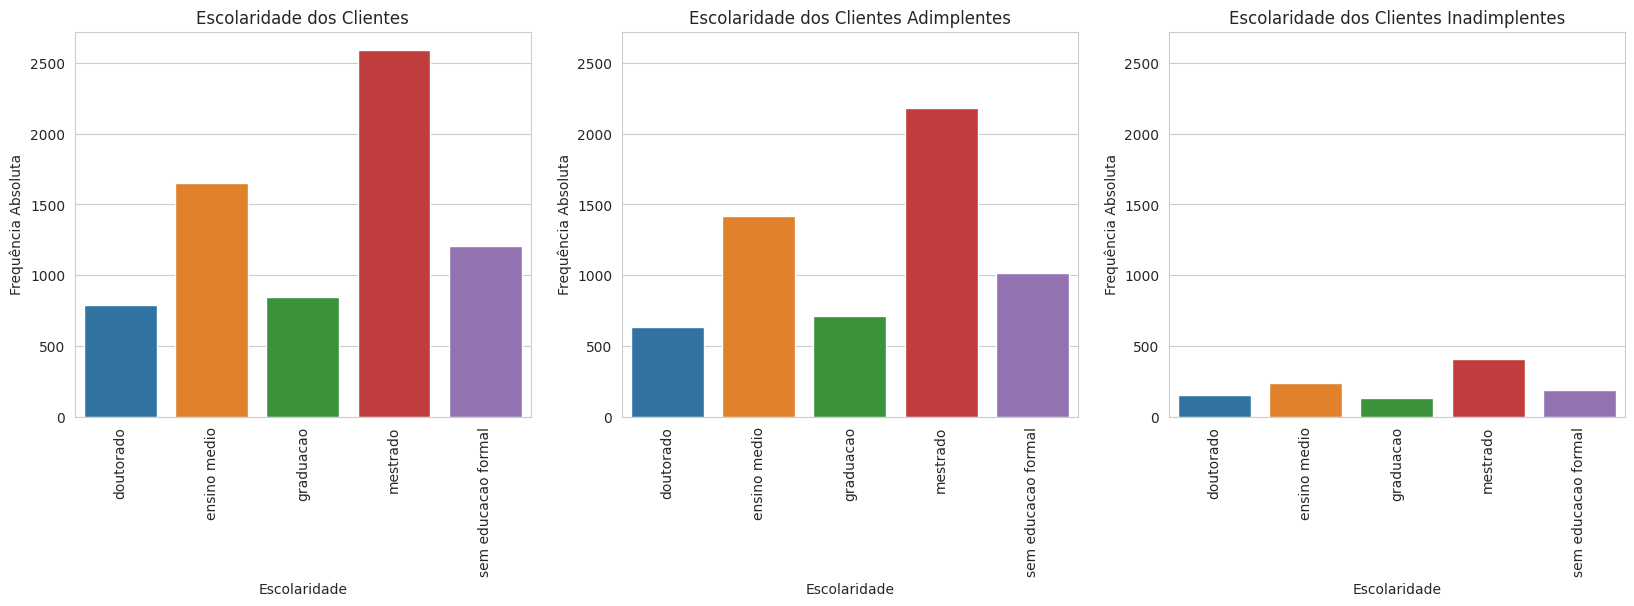

In [79]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Analisando os gráficos da escolaridade, podemos perceber que nos 3 se mantem uma configuração praticamente igual, onde mestrado tem a maior frequência, depois ensino médio, sem educaçã formal, graduação e doutorado. A única diferença que encontramos e que é irrelevante é no gráfico de inadimplentes, no qual doutorado tem um pouco mais que graduação. Então podemos por agora descartar Escolaridade.

*   Estado Civil

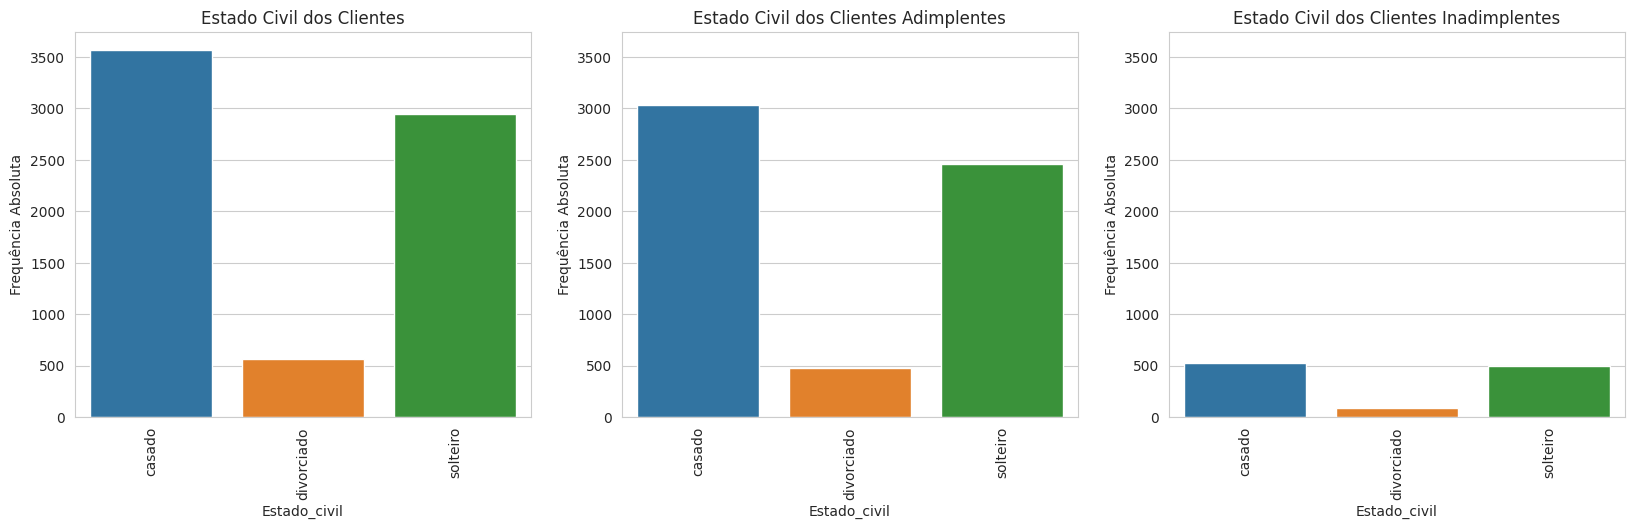

In [80]:
coluna = 'estado_civil'
titulos = ['Estado Civil dos Clientes', 'Estado Civil dos Clientes Adimplentes', 'Estado Civil dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Estado civil também não conseguimos encontrar diferença significativa no gráfico de inadimplentes que possa justificar nosso problema. Vemos que o gráfico de adimplentes e inadimplentes é extremamente similar

*   Salário Anual

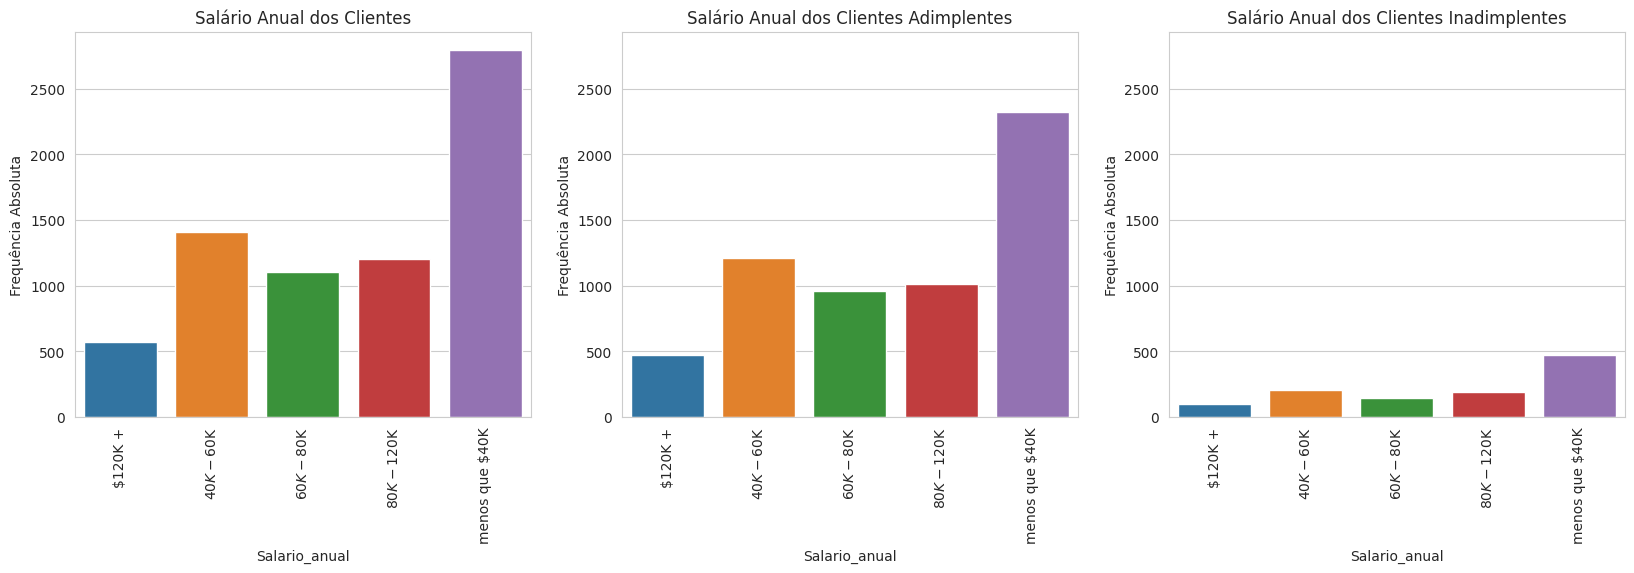

In [81]:
coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Aqui também não conseguimos concluir nada que justifique nosso problema. Os gráficos se mantém praticamente na mesma proporção, seguindo a mesma ideia dos gráficos de escolaridade

*   Tipo de Cartão

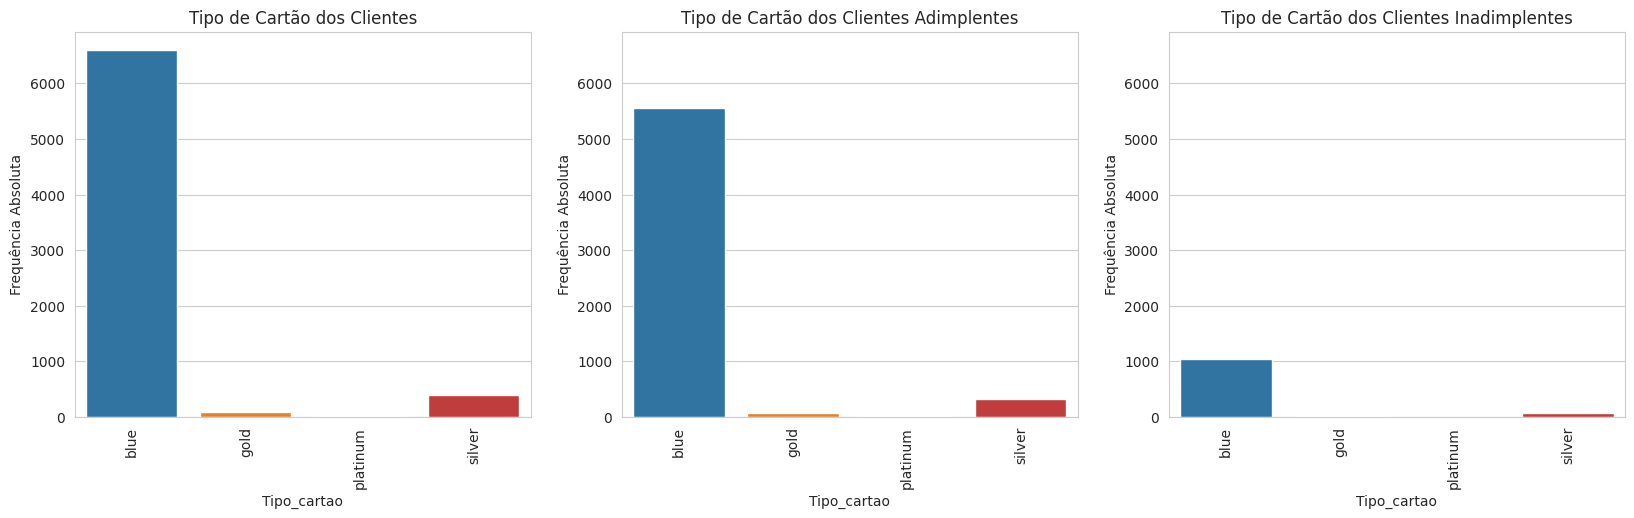

In [82]:
coluna = 'tipo_cartao'
titulos = ['Tipo de Cartão dos Clientes', 'Tipo de Cartão dos Clientes Adimplentes', 'Tipo de Cartão dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Nos gráficos de tipo de cartão dos clientes também não encontramos nada reelevante para o nosso problema em questão. Segue mesmo princípio dos gráticos acima.

Então o que podemos definir após analisar os atributos categóricos, é que nenhum deles tem algo significativo que possa explicar porque os clientes se tornam inadimplentes ou onde eles estão concentrados. Vamos agora analisar os atributos numéricos e ver se encontramos algo.

### **5.2 Visualizações numéricas**

Nesta seção, vamos visualizar a relação entre a variável resposta **default** com os atributos numéricos.

In [83]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


Utilizamos o código abaixo para criar 3 gráficos: De todos os clientes, dos adimplentes e inadimplentes.
Vamos utilizar as variáveis "df, df_adimplente, df_inadimplente" como dataframes para os 3 gráficos, definimos "frequência absoluta" para o eixo Y e multiplicamos esse valor por 1.1 para igualar todos os gráticos, e no eixo X definimos como nome da coluna que estamos analisamos.

Esse código será usado para todas os atributos categóricos: idade, dependentes, meses_de_relacionamento, qtd_produtos, iterações_12m, meses_inativo_12m, limite_credito, valor_transacoes_12m e qtd_transacoes_12m



*  Idade




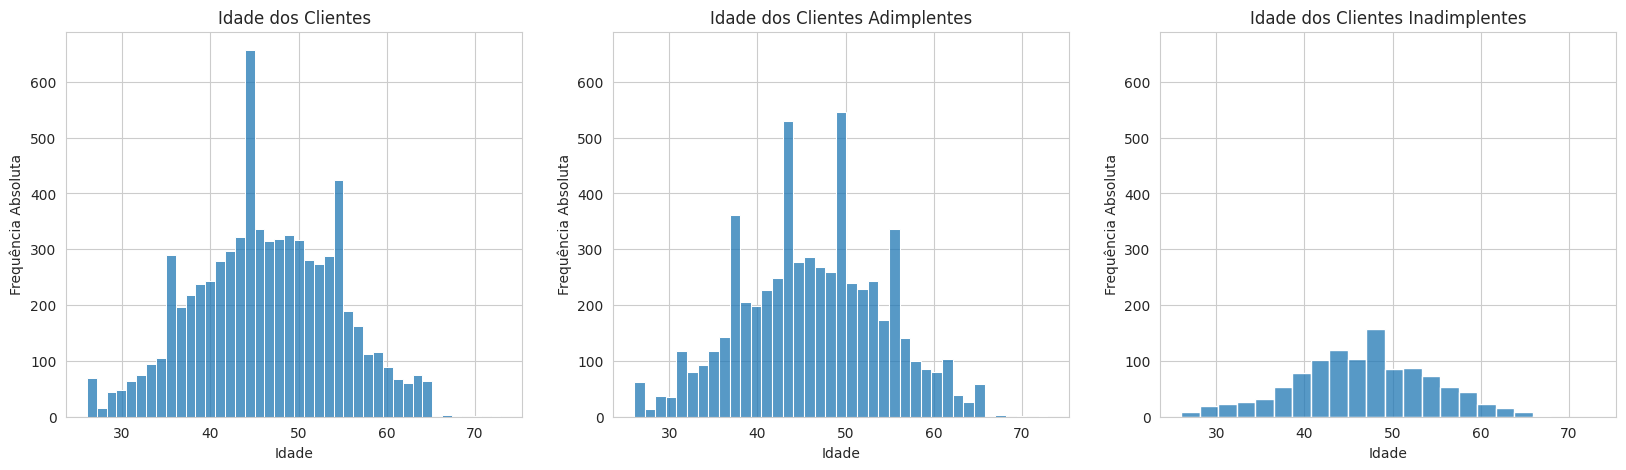

In [84]:
coluna = 'idade'
titulos = ['Idade dos Clientes', 'Idade dos Clientes Adimplentes',
           'Idade dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
      #stat= métrica que ele vai utilizar pra fazer a conta
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Percebemos que todos os gráfico iniciam baixo a partir dos 30 anos, e tem um pico entre 40 e 50 anos de idade, e decai até os 60 anos. A partir disso, podemos concluir que não há algo significativo que possa explicar o problema. Vamos para o próximo



*   Dependentes




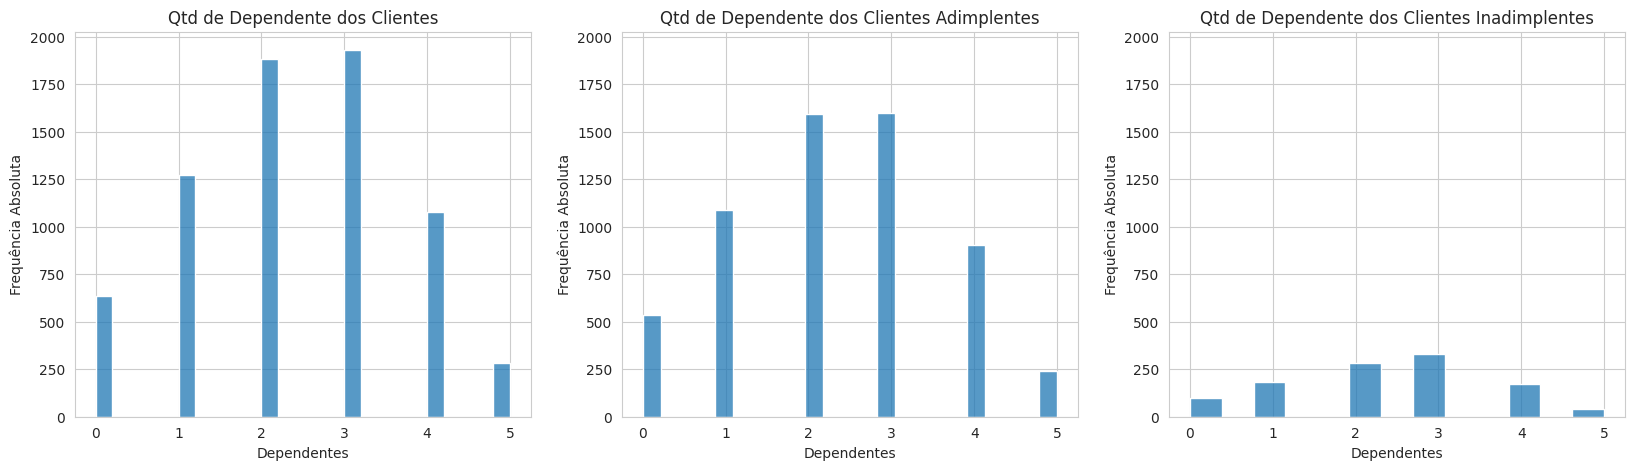

In [85]:
coluna = 'dependentes'
titulos = ['Qtd de Dependente dos Clientes',
           'Qtd de Dependente dos Clientes Adimplentes',
           'Qtd de Dependente dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
      #stat= métrica que ele vai utilizar pra fazer a conta
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Aqui temos mesma configuração de gráfico nos 3, configurando o mesmo princípio da conclusão dos gráficos de idade. Conclui-se que não tem nada significativo na quantidade de dependentes



*   Meses de Relacionamento do Cliente




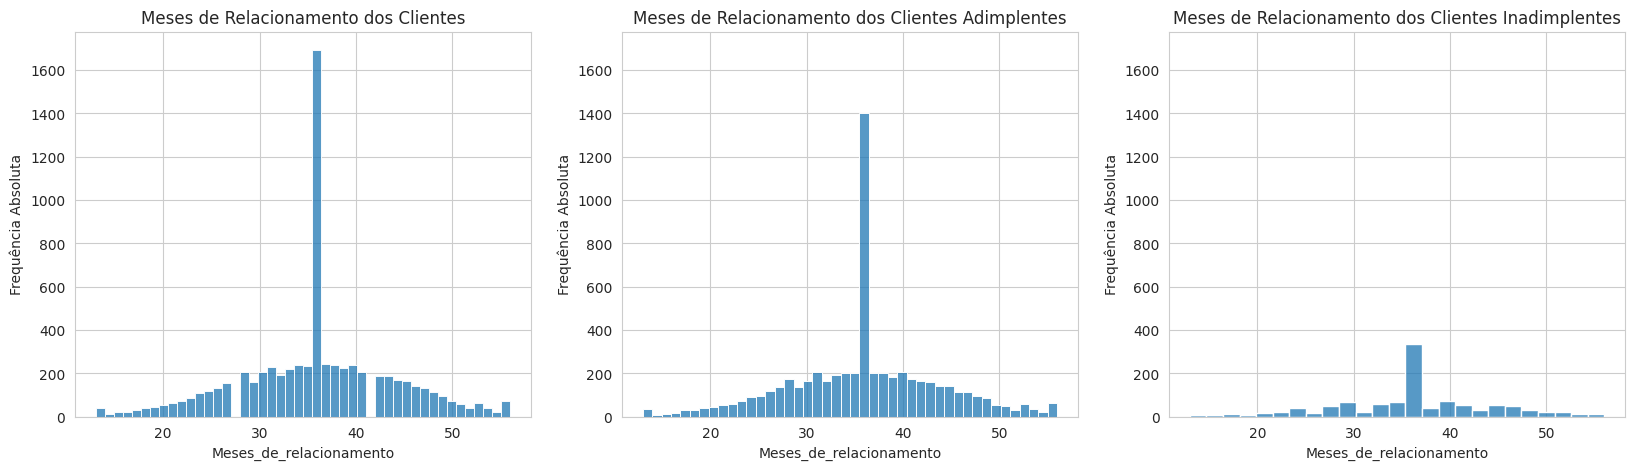

In [86]:
coluna = 'meses_de_relacionamento'
titulos = ['Meses de Relacionamento dos Clientes',
           'Meses de Relacionamento dos Clientes Adimplentes',
           'Meses de Relacionamento dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
      #stat= métrica que ele vai utilizar pra fazer a conta
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Os meses de relacionamento do cliente também não possui diferença de gráfico entre adimplentes e inadimplentes, podemos ver o pico de meses ali entre 30 e 40 meses em ambos, não havendo diferença entre esses clientes. Vamos para o próximo



*   Quantidade de Produtos Contratados pelos Clientes


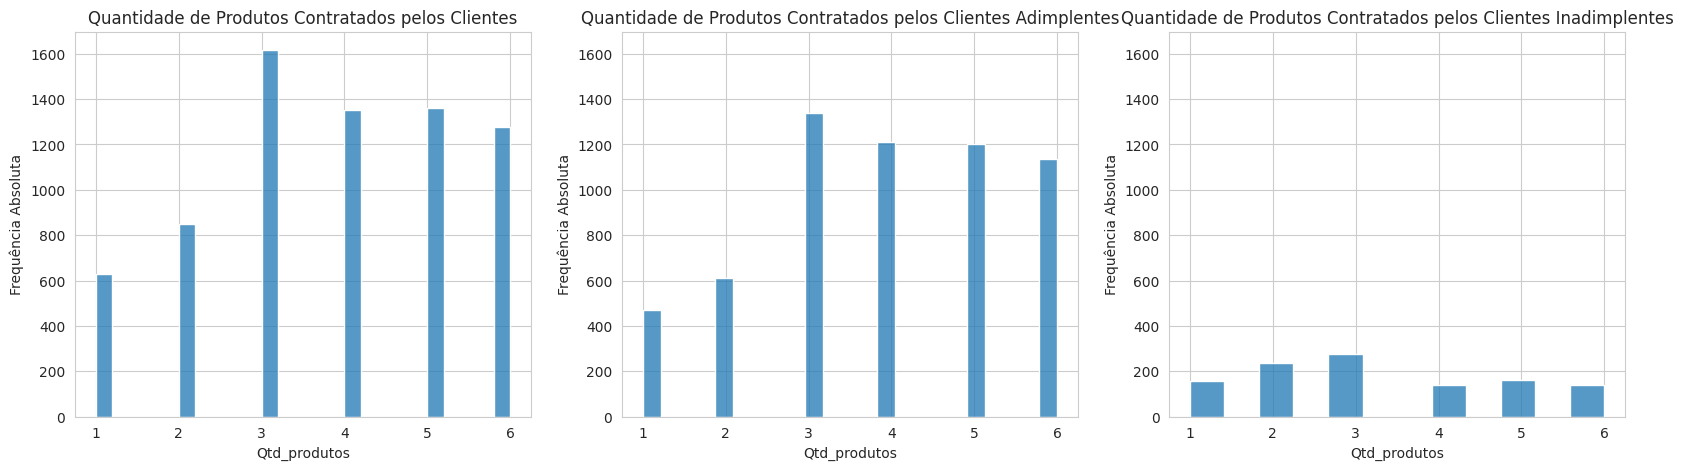

In [87]:
coluna = 'qtd_produtos'
titulos = ['Quantidade de Produtos Contratados pelos Clientes',
           'Quantidade de Produtos Contratados pelos Clientes Adimplentes',
           'Quantidade de Produtos Contratados pelos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
      #stat= métrica que ele vai utilizar pra fazer a conta
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Aqui pela primeira vez temos algo pra analisar. Podemos ver que o gráfico da quantidade de produtos contratados pelos clientes e o gráfico da quantidade de produtos contratados pelos clientes adimplentes, são praticamente iguais. 3 produtos tem a maior frequência, depois vem 4 a 6 produtos, e menor frequência em 1 e 2 produtos.

Porém, quando analisamos o gráfico da quantidade de produtos contratados pelos clientes inadimplentes, vemos maior frequência com 3 produtos, e depois vem as maiores frequências em 1 e 2 produtos, sendo a frequência de 1 produto e assemelhar a de 5 produtos. A questão aqui é que nos 2 primeiros gráficos, 1 e 2 produtos são as menores frequências de clientes, e no último gráfico eles tem quantidade significativa maior, principalmente 2 produtos, quando vemos proporcionalmente com as frequências de 4 a 6 produtos.

Sendo assim, podemos concluir que há grande chances de clientes que contratam 1 e 2 produtos se tornarem inadimplentes



*   Iterações nos últimos 12 meses


In [ ]:
coluna = 'iteracoes_12m'
titulos = ['Quantidade de Iterações com Clientes',
           'Quantidade de Iterações com Clientes Adimplentes',
           'Quantidade de Iterações com Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
      #stat= métrica que ele vai utilizar pra fazer a conta
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Vamos descartar inicialmente as quantidades de iterações 0, 5 e 6 dessa análise, pois não tem mudanças significativas.

Se analisarmos o desenho dos dois primeiros gráficos, vemos que 2 e 3 iterações brigam no topo, depois vem 1 e 4 iterações praticamente na metade da frequência. Agora, se vermos o gráfico de inadimplentes, percebemos que 3 iterações tem quase o dobro de frequência comparado a 2 iterações, sendo que vinha brigando nos dois primeiros gráficos.

E no gráfico de adimplentes, a frequência de 2 iterações ganha um pouco da frequência de 3 iterações, enquanto no gráfico de inadimplentes, a frequência de 3 iterações é muito maior que 2 iterações.

Podemos concluir que exista uma possibilidade de clientes com 3 iterações possuir leve chance de se tornarem inadimplentes, tomando partido que é o único gráfico onde 3 iterações tem um ganho significativo proporcionalmente em relação as outras.



* Quantidade de meses inativo no último ano




In [ ]:
coluna = 'meses_inativo_12m'
titulos = ['Meses Inativo no Último Ano dos Clientes',
           'Meses Inativo no Último Ano dos Clientes Adimplentes',
           'Meses Inativo no Último Ano dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
      #stat= métrica que ele vai utilizar pra fazer a conta
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Nos meses inativos no último ano, não há diferença de gráfico entre adimplentes e inadimplentes, ambos começam a subir a partir de 1 mês e tem pico com 3 meses, decaindo drasticamente com 4 meses em diante, então não temos o que tirar dessa coluna.



*   Limite de Crédito



In [ ]:
coluna = 'limite_credito'
titulos = ['Limite de Crédito dos Clientes',
           'Limite de Crédito dos Clientes Adimplentes',
           'Limite de Crédito dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
      #stat= métrica que ele vai utilizar pra fazer a conta
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Aqui também não temos nada de diferente, podemos perceber a partir de uns 2500 um pico no gráfico, e ao decorrer que aumenta o limite, a frequência diminui constantemente, até chegar em torno de 33000 onde vemos um pequeno pico de frequência. Então, nada a se concluir aqui.




*  Valor das Transações nos Últimos 12 meses






In [ ]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano',
           'Valor das Transações no Último Ano de Adimplentes',
           'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Nessa coluna conseguimos algo interessante. Percebe-se que no gráfico de adimplentes, em torno de 2500 existe um buraco, e os picos estão em 5000 e mais ou menos em 2000. Já nos inadimplentes, temos o pico do gráfico exatamente onde existe o buraco no gráfico de adimplentes, em torno de 2500

Então, existe grande chance de se tornarem inadimplentes, os clientes que no último ano transacionaram valores de 2000 a 4000 reais



*   Quantidade de Transações nos Últimos 12 Meses



In [ ]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano',
           'Qtd. de Transações no Último Ano de Adimplentes',
           'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
      #stat= métrica que ele vai utilizar pra fazer a conta
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Temos algo interessante na quantidade de transações.

No gráfico de adimplentes, temos um pico menor entre 20 e 40 transações, o gráfico cai entre 40 e 60, e tem pico maior entre 60 e 80 transações, até começar a cair de novo. Já no gráfico de adimplentes, percebemos que o gráfico tem pico de transações a partir de 40 transações e vai até mais o menos 45, caindo um pouco em 50, exatamente onde no gráfico de adimplentes decai a quantidade de transações.

Então, existe também possibilidade dos clientes que transacionam entre 40 e 50 de se tornarem inadimplentes

Vamos comparar agora as variáveis numéricas que mais tiveram diferenças, que são os valores das transações e quantidade de transações nos últimos 12 meses

 - Valor de Transações nos Últimos 12 Meses x Quantidade de Transações nos Últimos 12 Meses

In [ ]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Quantidade das Transações no Último Ano'
  )

Quando relacionamos as informações, podemos tirar alguns *insights*:


1.   Temos um acúmulo de inadimplentes entre 20 e 60 transações, no valor de 1000 até 3500 reais.
2.   Outro acúmulo de inadimplentes de 60 a 80 transações, nos valores de 7500 a 10000 reais.
3.   E uma pequena quantidade de clientes entre 40 a 60 transações perto do valor de 5000 reais

Então podemos manter o olho em clientes do primeiro e segundo insight, quando as informações se cruzarem nesses respectivos valores, e criar mecanismos para não se tornarem inadimplentes


## 6\. Resumo dos *Insights* Gerados


Analisamos todos os dados para encontrarmos motivos que poderiam estar causando inadimplência dos clientes

De todos os dados analisados, os que tiveram melhores insights em relação ao problema que buscamos foi os valores e quantidade de transações feitas pelos clientes nos últimos 12 meses.

A partir desses dados, concluímos as seguintes possibilidades de inadimplência:

1.  Clientes que fazem entre 40 e 50 transações.
2.  Que no último ano transacionaram valores de 2000 a 4000 reais
3.  Que fizeram entre 20 e 60 transações, no valor de 1000 até 3500 reais.
4.  E que fizeram entre 60 a 80 transações, nos valores de 7500 a 10000 reais.

Assim, concluímos nossa análise. Obrigado

